In [241]:
import numpy as np
import pandas as pd
import util
import ml_alg
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
train_path = 'dataSets/training/'
test_path = "dataSets/testing_phase1/"

# Get the volume count for each time window

In [243]:
avg_volume_data = pd.read_csv(train_path + 'training_20min_avg_volume.csv', header = 0, error_bad_lines=False)
avg_weather_data = pd.read_csv(train_path + 'training_20min_weather.csv', header = 0, error_bad_lines=False)
avg_traveltime_data = pd.read_csv(train_path + 'processed_travel_time.csv', header = 0, error_bad_lines=False)

In [244]:
volume_weather = avg_volume_data.merge(avg_weather_data, left_on='time_window', right_on='time_window', how='outer')

In [245]:
volume_weather.head()

,tollgate_id,time_window,direction,volume,volume_model0,volume_model1,volume_model2,volume_model3,volume_model4,volume_model5,...,volume_type0,volume_type1,volume_type2,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation
0,2,2016-09-19 00:00:00,0,2,0,1,1,0,0,0,...,0,0,2,1008.2,1013.2,329,2.8,22.2,76,0.0
1,3,2016-09-19 00:00:00,0,17,0,11,0,2,0,3,...,0,0,17,1008.2,1013.2,329,2.8,22.2,76,0.0
2,3,2016-09-19 00:00:00,1,181,0,162,6,4,5,2,...,160,21,0,1008.2,1013.2,329,2.8,22.2,76,0.0
3,1,2016-09-19 00:00:00,0,13,0,10,1,0,0,2,...,0,0,13,1008.2,1013.2,329,2.8,22.2,76,0.0
4,1,2016-09-19 00:00:00,1,140,0,125,7,2,2,0,...,109,31,0,1008.2,1013.2,329,2.8,22.2,76,0.0


In [246]:
volume_weather_travel_time = volume_weather.merge(avg_traveltime_data, left_on='time_window', right_on='time_window', how='outer')

In [247]:
volume_weather_travel_time.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tollgate_id,10440,NaN,NaN,NaN,2,0.89447,1,1,2,3,3
time_window,10440,2088,2016-10-10 19:20:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
direction,10440,NaN,NaN,NaN,0.4,0.489921,0,0,0,1,1
volume,10440,NaN,NaN,NaN,52.0784,47.0417,0,12,37,87,296
volume_model0,10440,NaN,NaN,NaN,7.41475,29.2216,0,0,0,0,257
volume_model1,10440,NaN,NaN,NaN,37.5117,36.6348,0,8,22,66,287
volume_model2,10440,NaN,NaN,NaN,4.79732,5.86779,0,1,3,6,60
volume_model3,10440,NaN,NaN,NaN,0.834579,1.2632,0,0,0,1,12
volume_model4,10440,NaN,NaN,NaN,0.587931,1.15539,0,0,0,1,20
volume_model5,10440,NaN,NaN,NaN,0.866379,1.36593,0,0,0,1,11


volume_model3 - volume_model7 combined to one model. 

In [113]:
toll_gate_1_0 = volume_weather_travel_time[volume_weather_travel_time['tollgate_id']==1][volume_weather_travel_time['direction']==0].ix[:,3]
toll_gate_2_0 = volume_weather_travel_time[volume_weather_travel_time['tollgate_id']==2][volume_weather_travel_time['direction']==0].ix[:,3]
toll_gate_3_0 = volume_weather_travel_time[volume_weather_travel_time['tollgate_id']==3][volume_weather_travel_time['direction']==0].ix[:,3]
toll_gate_1_1 = volume_weather_travel_time[volume_weather_travel_time['tollgate_id']==1][volume_weather_travel_time['direction']==1].ix[:,3]
toll_gate_3_1 = volume_weather_travel_time[volume_weather_travel_time['tollgate_id']==3][volume_weather_travel_time['direction']==1].ix[:,3]
index = volume_weather_travel_time[volume_weather_travel_time['tollgate_id']==3][volume_weather_travel_time['direction']==1]['time_window'].as_matrix()
toll_gate_1_0 = pd.DataFrame({'volume': toll_gate_1_0.as_matrix()},index = index)
toll_gate_2_0 = pd.DataFrame({'volume': toll_gate_2_0.as_matrix()},index = index)
toll_gate_3_0 = pd.DataFrame({'volume': toll_gate_3_0.as_matrix()},index = index)
toll_gate_1_1 = pd.DataFrame({'volume': toll_gate_1_1.as_matrix()},index = index)
toll_gate_3_1 = pd.DataFrame({'volume': toll_gate_3_1.as_matrix()},index = index)

/Users/Solomon/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/Solomon/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/Solomon/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/Solomon/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/Solomon/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/Solomon/anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: 

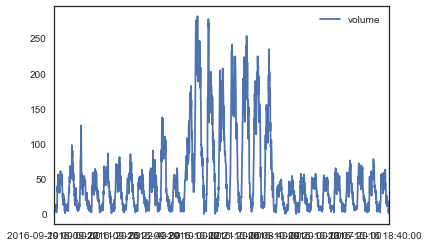

In [114]:
toll_gate_1_0.plot()

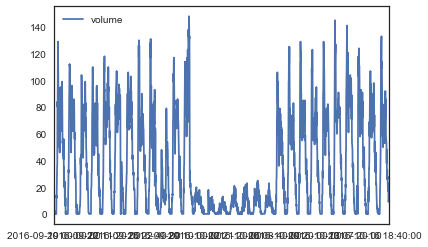

In [115]:
toll_gate_2_0.plot()

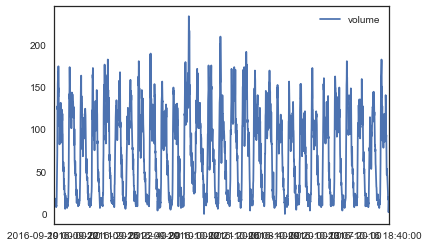

In [116]:
toll_gate_3_0.plot()

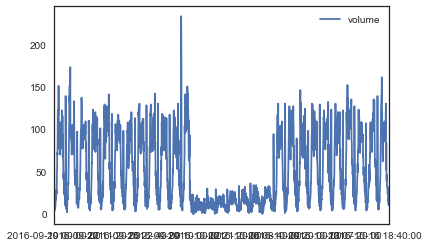

In [117]:
toll_gate_1_1.plot()

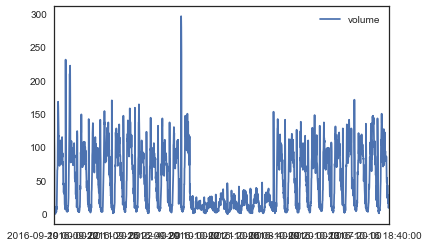

In [118]:
toll_gate_3_1.plot()

There are obvious correlation among tollgates. 1_1 and 3_1 have very similar trends. 1_0 and 2_0 has negative correlated relationship. 3_0 seems to be more independent. 

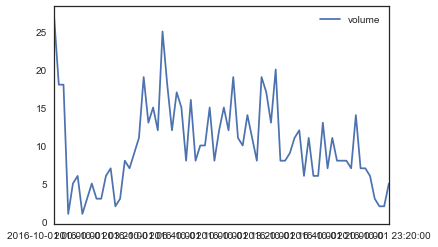

In [119]:
toll_gate_3_1.ix['2016-10-01 00:00:00':'2016-10-01 23:40:00'].plot()

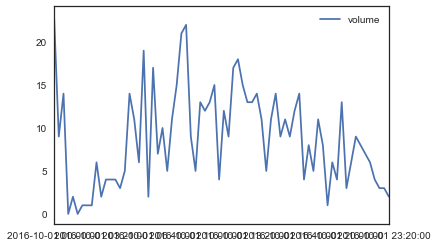

In [120]:
toll_gate_1_1.ix['2016-10-01 00:00:00':'2016-10-01 23:40:00'].plot()

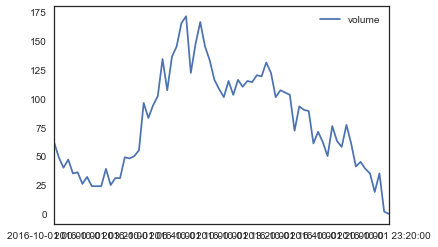

In [121]:
toll_gate_3_0.ix['2016-10-01 00:00:00':'2016-10-01 23:40:00'].plot()

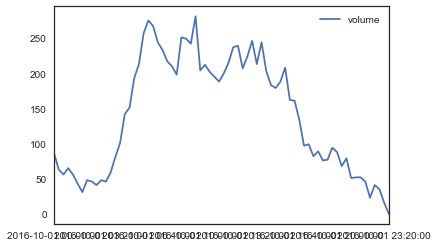

In [122]:
toll_gate_1_0.ix['2016-10-01 00:00:00':'2016-10-01 23:40:00'].plot()

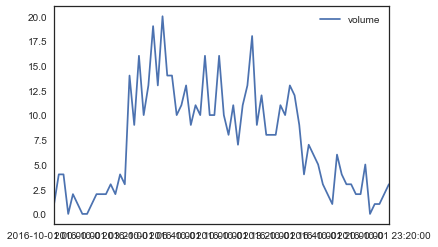

In [123]:
toll_gate_2_0.ix['2016-10-01 00:00:00':'2016-10-01 23:40:00'].plot()

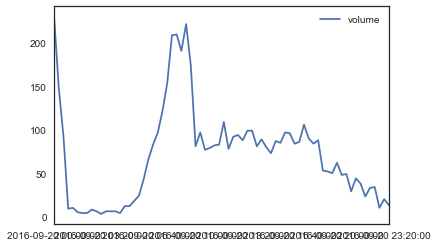

In [124]:
toll_gate_3_1.ix['2016-09-20 00:00:00':'2016-09-20 23:40:00'].plot()

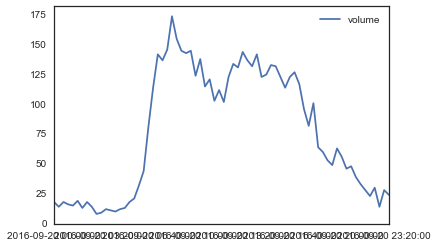

In [125]:
toll_gate_3_0.ix['2016-09-20 00:00:00':'2016-09-20 23:40:00'].plot()

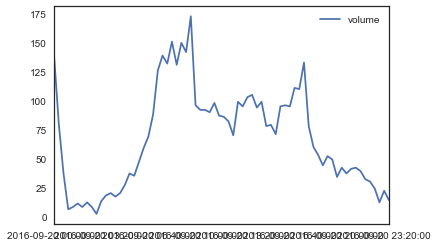

In [126]:
toll_gate_1_1.ix['2016-09-20 00:00:00':'2016-09-20 23:40:00'].plot()

In [127]:
volume_toll_gates = pd.concat([toll_gate_1_0, toll_gate_1_1, toll_gate_2_0, toll_gate_3_0, toll_gate_3_1], axis=1)

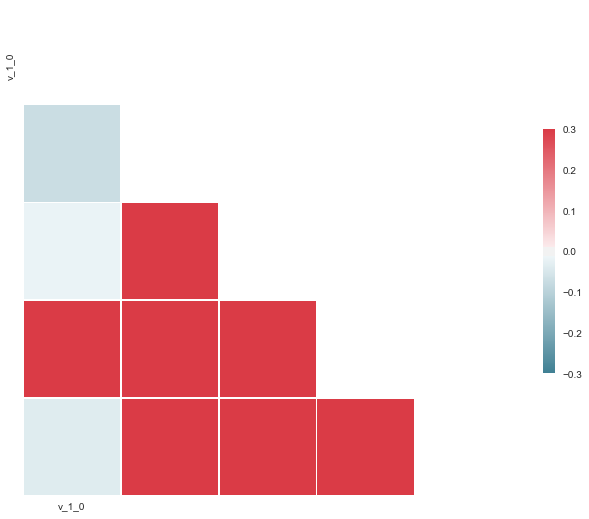

In [130]:
#1_0, 1_1, 2_0, 3_0, 3_1
volume_toll_gates.columns = ['v_1_0', 'v_1_1', 'v_2_0', 'v_3_0', 'v_3_1']
util.plot_corr(volume_toll_gates)

In [62]:
volume_toll_gates['v_1_0'].autocorr(lag=6)

0.82997499785007178

In [67]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [68]:
crosscorr(volume_toll_gates['v_3_0'], volume_toll_gates['v_2_0'], 4)

0.57015851249656402

In [248]:
volume_weather_travel_time['volume_model3'] = volume_weather_travel_time['volume_model3'] + volume_weather_travel_time['volume_model4'] + volume_weather_travel_time['volume_model5']+ volume_weather_travel_time['volume_model6']+ volume_weather_travel_time['volume_model7']

In [249]:
volume_weather_travel_time['volume_model3'].describe()

count    10440.000000
mean         2.354693
std          2.811400
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         32.000000
Name: volume_model3, dtype: float64

In [250]:
volume_weather_travel_time.drop(['volume_model4'], axis=1, inplace=True)
volume_weather_travel_time.drop(['volume_model5'], axis=1, inplace=True)
volume_weather_travel_time.drop(['volume_model6'], axis=1, inplace=True)
volume_weather_travel_time.drop(['volume_model7'], axis=1, inplace=True)

In [251]:
volume_weather_travel_time.head()

,tollgate_id,time_window,direction,volume,volume_model0,volume_model1,volume_model2,volume_model3,volume_etc0,volume_etc1,...,wind_speed,temperature,rel_humidity,precipitation,A2,A3,B1,B3,C1,C3
0,2,2016-09-19 00:00:00,0,2,0,1,1,0,2,0,...,2.8,22.2,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44
1,3,2016-09-19 00:00:00,0,17,0,11,0,6,17,0,...,2.8,22.2,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44
2,3,2016-09-19 00:00:00,1,181,0,162,6,13,135,46,...,2.8,22.2,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44
3,1,2016-09-19 00:00:00,0,13,0,10,1,2,9,4,...,2.8,22.2,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44
4,1,2016-09-19 00:00:00,1,140,0,125,7,8,107,33,...,2.8,22.2,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44


In [252]:
volume_weather_travel_time['dayofweek'] = pd.DatetimeIndex(volume_weather_travel_time['time_window']).dayofweek
(volume_weather_travel_time['time_window'] >= '2016-09-19 00:00:00') & (volume_weather_travel_time['time_window'] < '2016-10-08 00:00:00')
volume_weather_travel_time.loc[(volume_weather_travel_time['time_window'] >= '2016-10-01 00:00:00') & (volume_weather_travel_time['time_window'] < '2016-10-08 00:00:00'), 'dayofweek'] = 7
volume_weather_travel_time.loc[(volume_weather_travel_time['time_window'] >= '2016-10-08 00:00:00') & (volume_weather_travel_time['time_window'] < '2016-10-09 00:00:00'), 'dayofweek'] = 0
volume_weather_travel_time.loc[(volume_weather_travel_time['time_window'] >= '2016-10-09 00:00:00') & (volume_weather_travel_time['time_window'] < '2016-10-10 00:00:00'), 'dayofweek'] = 1
volume_weather_travel_time.loc[(volume_weather_travel_time['dayofweek'] >= 0) & (volume_weather_travel_time['dayofweek'] <= 3), 'dayofweek'] = 0
volume_weather_travel_time.loc[volume_weather_travel_time['dayofweek'] == 4, 'dayofweek'] = 1
volume_weather_travel_time.loc[(volume_weather_travel_time['dayofweek'] == 5) | (volume_weather_travel_time['dayofweek'] == 6), 'dayofweek'] = 2
volume_weather_travel_time.loc[volume_weather_travel_time['dayofweek'] == 7, 'dayofweek'] = 3

In [253]:
byday = volume_weather_travel_time.groupby('dayofweek')
# 统计下没注册的用户租赁情况
byday['volume'].sum().reset_index()

,dayofweek,volume
0,0,284762
1,1,68798
2,2,79426
3,3,110713


In [254]:
volume_weather_travel_time['hour'] = pd.DatetimeIndex(volume_weather_travel_time['time_window']).hour

In [255]:
byhour = volume_weather_travel_time.groupby('hour')
# 统计下没注册的用户租赁情况
byhour['volume'].sum().reset_index()
#0
#1 - 5 22 23
#6
#7
#10 11 12
#8
#9
#(13 14 15 16)
#17
#18
#19
#20
#21

,hour,volume
0,0,16689
1,1,3631
2,2,2998
3,3,3318
4,4,4386
5,5,7431
6,6,16487
7,7,33003
8,8,43394
9,9,41894


In [256]:
volume_weather_travel_time['hour'] = pd.DatetimeIndex(volume_weather_travel_time['time_window']).hour
volume_weather_travel_time.loc[(volume_weather_travel_time['hour'] >= 1) & (volume_weather_travel_time['hour'] < 6), 'hour'] = 1
volume_weather_travel_time.loc[(volume_weather_travel_time['hour'] >= 22) & (volume_weather_travel_time['hour'] < 24), 'hour'] = 1
volume_weather_travel_time.loc[(volume_weather_travel_time['hour'] >= 10) & (volume_weather_travel_time['hour'] < 13), 'hour'] = 2
volume_weather_travel_time.loc[(volume_weather_travel_time['hour'] >= 13) & (volume_weather_travel_time['hour'] <= 17), 'hour'] = 3

In [257]:
byhour = volume_weather_travel_time.groupby('hour')
# 统计下没注册的用户租赁情况
byhour['volume'].sum().reset_index()

,hour,volume
0,0,16689
1,1,35287
2,2,97634
3,3,184899
4,6,16487
5,7,33003
6,8,43394
7,9,41894
8,18,25351
9,19,19606


In [258]:
volume_weather_travel_time['minute'] = pd.DatetimeIndex(volume_weather_travel_time['time_window']).minute

In [259]:
byminute = volume_weather_travel_time.groupby('minute')
# 统计下没注册的用户租赁情况
byminute['volume'].sum().reset_index()

,minute,volume
0,0,180965
1,20,181985
2,40,180749


In [260]:
volume_weather_travel_time.drop(['minute'], axis=1, inplace=True)

In [261]:
volume_weather_travel_time.head()

,tollgate_id,time_window,direction,volume,volume_model0,volume_model1,volume_model2,volume_model3,volume_etc0,volume_etc1,...,rel_humidity,precipitation,A2,A3,B1,B3,C1,C3,dayofweek,hour
0,2,2016-09-19 00:00:00,0,2,0,1,1,0,2,0,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
1,3,2016-09-19 00:00:00,0,17,0,11,0,6,17,0,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
2,3,2016-09-19 00:00:00,1,181,0,162,6,13,135,46,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
3,1,2016-09-19 00:00:00,0,13,0,10,1,2,9,4,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
4,1,2016-09-19 00:00:00,1,140,0,125,7,8,107,33,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0


In [262]:
volume_weather_travel_time.to_csv('backup2.csv')

In [291]:
volume_weather_travel_time.drop(['volume_type2'], axis=1, inplace=True)

In [301]:
data_1_0 = volume_weather_travel_time[(volume_weather_travel_time['tollgate_id'] == 1) & (volume_weather_travel_time['direction'] == 0)]
data_1_1 = volume_weather_travel_time[(volume_weather_travel_time['tollgate_id'] == 1) & (volume_weather_travel_time['direction'] == 1)]
data_2_0 = volume_weather_travel_time[(volume_weather_travel_time['tollgate_id'] == 2) & (volume_weather_travel_time['direction'] == 0)]
data_3_0 = volume_weather_travel_time[(volume_weather_travel_time['tollgate_id'] == 3) & (volume_weather_travel_time['direction'] == 0)]
data_3_1 = volume_weather_travel_time[(volume_weather_travel_time['tollgate_id'] == 3) & (volume_weather_travel_time['direction'] == 1)]

In [302]:
data_1_0 = data_1_0.set_index('time_window')
data_1_1 = data_1_1.set_index('time_window')
data_2_0 = data_2_0.set_index('time_window')
data_3_0 = data_3_0.set_index('time_window')
data_3_1 = data_3_1.set_index('time_window')


In [303]:
data_1_0.drop(['tollgate_id', 'direction'], axis=1, inplace=True)
data_1_1.drop(['tollgate_id', 'direction'], axis=1, inplace=True)
data_2_0.drop(['tollgate_id', 'direction'], axis=1, inplace=True)
data_3_0.drop(['tollgate_id', 'direction'], axis=1, inplace=True)
data_3_1.drop(['tollgate_id', 'direction'], axis=1, inplace=True)

In [304]:
volume_weather_travel_time.head()

,tollgate_id,time_window,direction,volume,volume_model0,volume_model1,volume_model2,volume_model3,volume_etc0,volume_etc1,...,rel_humidity,precipitation,A2,A3,B1,B3,C1,C3,dayofweek,hour
0,2,2016-09-19 00:00:00,0,2,0,1,1,0,2,0,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
1,3,2016-09-19 00:00:00,0,17,0,11,0,6,17,0,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
2,3,2016-09-19 00:00:00,1,181,0,162,6,13,135,46,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
3,1,2016-09-19 00:00:00,0,13,0,10,1,2,9,4,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
4,1,2016-09-19 00:00:00,1,140,0,125,7,8,107,33,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0


In [305]:
shift_6 = pd.DataFrame({'volume_1_0_6': data_1_0['volume'].shift(6).as_matrix(), 'volume_1_1_6': data_1_1['volume'].shift(6).as_matrix(), 'volume_2_0_6': data_2_0['volume'].shift(6).as_matrix(), 'volume_3_0_6': data_3_0['volume'].shift(6).as_matrix(), 'volume_3_1_6': data_3_1['volume'].shift(6).as_matrix(),
    'vm0_1_0_6': data_1_0['volume_model0'].shift(6).as_matrix(), 'vm0_1_1_6': data_1_1['volume_model0'].shift(6).as_matrix(), 'vm0_2_0_6': data_2_0['volume_model0'].shift(6).as_matrix(), 'vm0_3_0_6': data_3_0['volume_model0'].shift(6).as_matrix(), 'vm0_3_1_6': data_3_1['volume_model0'].shift(6).as_matrix(),
                                'vm1_1_0_6': data_1_0['volume_model1'].shift(6).as_matrix(), 'vm1_1_1_6': data_1_1['volume_model1'].shift(6).as_matrix(), 'vm1_2_0_6': data_2_0['volume_model1'].shift(6).as_matrix(), 'vm1_3_0_6': data_3_0['volume_model1'].shift(6).as_matrix(), 'vm1_3_1_6': data_3_1['volume_model1'].shift(6).as_matrix(),
                               'vm2_1_0_6': data_1_0['volume_model2'].shift(6).as_matrix(), 'vm2_1_1_6': data_1_1['volume_model2'].shift(6).as_matrix(), 'vm2_2_0_6': data_2_0['volume_model2'].shift(6).as_matrix(), 'vm2_3_0_6': data_3_0['volume_model2'].shift(6).as_matrix(), 'vm2_3_1_6': data_3_1['volume_model2'].shift(6).as_matrix(),
                               'vm3_1_0_6': data_1_0['volume_model3'].shift(6).as_matrix(), 'vm3_1_1_6': data_1_1['volume_model3'].shift(6).as_matrix(), 'vm3_2_0_6': data_2_0['volume_model3'].shift(6).as_matrix(), 'vm3_3_0_6': data_3_0['volume_model3'].shift(6).as_matrix(), 'vm3_3_1_6': data_3_1['volume_model3'].shift(6).as_matrix(),
                               've0_1_0_6': data_1_0['volume_etc0'].shift(6).as_matrix(), 've0_1_1_6': data_1_1['volume_etc0'].shift(6).as_matrix(), 've0_2_0_6': data_2_0['volume_etc0'].shift(6).as_matrix(), 've0_3_0_6': data_3_0['volume_etc0'].shift(6).as_matrix(), 've0_3_1_6': data_3_1['volume_etc0'].shift(6).as_matrix(),
                               've1_1_0_6': data_1_0['volume_etc1'].shift(6).as_matrix(), 've1_1_1_6': data_1_1['volume_etc1'].shift(6).as_matrix(), 've1_2_0_6': data_2_0['volume_etc1'].shift(6).as_matrix(), 've1_3_0_6': data_3_0['volume_etc1'].shift(6).as_matrix(), 've1_3_1_6': data_3_1['volume_etc1'].shift(6).as_matrix(),
                               'vt0_1_0_6': data_1_0['volume_type0'].shift(6).as_matrix(), 'vt0_1_1_6': data_1_1['volume_type0'].shift(6).as_matrix(), 'vt0_2_0_6': data_2_0['volume_type0'].shift(6).as_matrix(), 'vt0_3_0_6': data_3_0['volume_type0'].shift(6).as_matrix(), 'vt0_3_1_6': data_3_1['volume_type0'].shift(6).as_matrix(),
                               'vt1_1_0_6': data_1_0['volume_type1'].shift(6).as_matrix(), 'vt1_1_1_6': data_1_1['volume_type1'].shift(6).as_matrix(), 'vt1_2_0_6': data_2_0['volume_type1'].shift(6).as_matrix(), 'vt1_3_0_6': data_3_0['volume_type1'].shift(6).as_matrix(), 'vt1_3_1_6': data_3_1['volume_type1'].shift(6).as_matrix(),
                       'A2_6': data_1_0['A2'].shift(6).as_matrix(), 'A3_6': data_1_0['A3'].shift(6).as_matrix(), 'B1_6': data_1_0['B1'].shift(6).as_matrix(), 'B3_6': data_1_0['B3'].shift(6).as_matrix(), 'C1_6': data_1_0['C1'].shift(6).as_matrix(), 'C3_6': data_1_0['C3'].shift(6).as_matrix()},index = index)

In [306]:
shift_5 = pd.DataFrame({'volume_1_0_5': data_1_0['volume'].shift(5).as_matrix(), 'volume_1_1_5': data_1_1['volume'].shift(5).as_matrix(), 'volume_2_0_5': data_2_0['volume'].shift(5).as_matrix(), 'volume_3_0_5': data_3_0['volume'].shift(5).as_matrix(), 'volume_3_1_5': data_3_1['volume'].shift(5).as_matrix(),
                        'vm0_1_0_5': data_1_0['volume_model0'].shift(5).as_matrix(), 'vm0_1_1_5': data_1_1['volume_model0'].shift(5).as_matrix(), 'vm0_2_0_5': data_2_0['volume_model0'].shift(5).as_matrix(), 'vm0_3_0_5': data_3_0['volume_model0'].shift(5).as_matrix(), 'vm0_3_1_5': data_3_1['volume_model0'].shift(5).as_matrix(),
                                'vm1_1_0_5': data_1_0['volume_model1'].shift(5).as_matrix(), 'vm1_1_1_5': data_1_1['volume_model1'].shift(5).as_matrix(), 'vm1_2_0_5': data_2_0['volume_model1'].shift(5).as_matrix(), 'vm1_3_0_5': data_3_0['volume_model1'].shift(5).as_matrix(), 'vm1_3_1_5': data_3_1['volume_model1'].shift(5).as_matrix(),
                               'vm2_1_0_5': data_1_0['volume_model2'].shift(5).as_matrix(), 'vm2_1_1_5': data_1_1['volume_model2'].shift(5).as_matrix(), 'vm2_2_0_5': data_2_0['volume_model2'].shift(5).as_matrix(), 'vm2_3_0_5': data_3_0['volume_model2'].shift(5).as_matrix(), 'vm2_3_1_5': data_3_1['volume_model2'].shift(5).as_matrix(),
                               'vm3_1_0_5': data_1_0['volume_model3'].shift(5).as_matrix(), 'vm3_1_1_5': data_1_1['volume_model3'].shift(5).as_matrix(), 'vm3_2_0_5': data_2_0['volume_model3'].shift(5).as_matrix(), 'vm3_3_0_5': data_3_0['volume_model3'].shift(5).as_matrix(), 'vm3_3_1_5': data_3_1['volume_model3'].shift(5).as_matrix(),
                               've0_1_0_5': data_1_0['volume_etc0'].shift(5).as_matrix(), 've0_1_1_5': data_1_1['volume_etc0'].shift(5).as_matrix(), 've0_2_0_5': data_2_0['volume_etc0'].shift(5).as_matrix(), 've0_3_0_5': data_3_0['volume_etc0'].shift(5).as_matrix(), 've0_3_1_5': data_3_1['volume_etc0'].shift(5).as_matrix(),
                               've1_1_0_5': data_1_0['volume_etc1'].shift(5).as_matrix(), 've1_1_1_5': data_1_1['volume_etc1'].shift(5).as_matrix(), 've1_2_0_5': data_2_0['volume_etc1'].shift(5).as_matrix(), 've1_3_0_5': data_3_0['volume_etc1'].shift(5).as_matrix(), 've1_3_1_5': data_3_1['volume_etc1'].shift(5).as_matrix(),
                               'vt0_1_0_5': data_1_0['volume_type0'].shift(5).as_matrix(), 'vt0_1_1_5': data_1_1['volume_type0'].shift(5).as_matrix(), 'vt0_2_0_5': data_2_0['volume_type0'].shift(5).as_matrix(), 'vt0_3_0_5': data_3_0['volume_type0'].shift(5).as_matrix(), 'vt0_3_1_5': data_3_1['volume_type0'].shift(5).as_matrix(),
                               'vt1_1_0_5': data_1_0['volume_type1'].shift(5).as_matrix(), 'vt1_1_1_5': data_1_1['volume_type1'].shift(5).as_matrix(), 'vt1_2_0_5': data_2_0['volume_type1'].shift(5).as_matrix(), 'vt1_3_0_5': data_3_0['volume_type1'].shift(5).as_matrix(), 'vt1_3_1_5': data_3_1['volume_type1'].shift(5).as_matrix(),
                       'A2_5': data_1_0['A2'].shift(5).as_matrix(), 'A3_5': data_1_0['A3'].shift(5).as_matrix(), 'B1_5': data_1_0['B1'].shift(5).as_matrix(), 'B3_5': data_1_0['B3'].shift(5).as_matrix(), 'C1_5': data_1_0['C1'].shift(5).as_matrix(), 'C3_5': data_1_0['C3'].shift(5).as_matrix()},index = index)

In [307]:
shift_4 = pd.DataFrame({'volume_1_0_4': data_1_0['volume'].shift(4).as_matrix(), 'volume_1_1_4': data_1_1['volume'].shift(4).as_matrix(), 'volume_2_0_4': data_2_0['volume'].shift(4).as_matrix(), 'volume_3_0_4': data_3_0['volume'].shift(4).as_matrix(), 'volume_3_1_4': data_3_1['volume'].shift(4).as_matrix(),
                        'vm0_1_0_4': data_1_0['volume_model0'].shift(4).as_matrix(), 'vm0_1_1_4': data_1_1['volume_model0'].shift(4).as_matrix(), 'vm0_2_0_4': data_2_0['volume_model0'].shift(4).as_matrix(), 'vm0_3_0_4': data_3_0['volume_model0'].shift(4).as_matrix(), 'vm0_3_1_4': data_3_1['volume_model0'].shift(4).as_matrix(),
                                'vm1_1_0_4': data_1_0['volume_model1'].shift(4).as_matrix(), 'vm1_1_1_4': data_1_1['volume_model1'].shift(4).as_matrix(), 'vm1_2_0_4': data_2_0['volume_model1'].shift(4).as_matrix(), 'vm1_3_0_4': data_3_0['volume_model1'].shift(4).as_matrix(), 'vm1_3_1_4': data_3_1['volume_model1'].shift(4).as_matrix(),
                               'vm2_1_0_4': data_1_0['volume_model2'].shift(4).as_matrix(), 'vm2_1_1_4': data_1_1['volume_model2'].shift(4).as_matrix(), 'vm2_2_0_4': data_2_0['volume_model2'].shift(4).as_matrix(), 'vm2_3_0_4': data_3_0['volume_model2'].shift(4).as_matrix(), 'vm2_3_1_4': data_3_1['volume_model2'].shift(4).as_matrix(),
                               'vm3_1_0_4': data_1_0['volume_model3'].shift(4).as_matrix(), 'vm3_1_1_4': data_1_1['volume_model3'].shift(4).as_matrix(), 'vm3_2_0_4': data_2_0['volume_model3'].shift(4).as_matrix(), 'vm3_3_0_4': data_3_0['volume_model3'].shift(4).as_matrix(), 'vm3_3_1_4': data_3_1['volume_model3'].shift(4).as_matrix(),
                               've0_1_0_4': data_1_0['volume_etc0'].shift(4).as_matrix(), 've0_1_1_4': data_1_1['volume_etc0'].shift(4).as_matrix(), 've0_2_0_4': data_2_0['volume_etc0'].shift(4).as_matrix(), 've0_3_0_4': data_3_0['volume_etc0'].shift(4).as_matrix(), 've0_3_1_4': data_3_1['volume_etc0'].shift(4).as_matrix(),
                               've1_1_0_4': data_1_0['volume_etc1'].shift(4).as_matrix(), 've1_1_1_4': data_1_1['volume_etc1'].shift(4).as_matrix(), 've1_2_0_4': data_2_0['volume_etc1'].shift(4).as_matrix(), 've1_3_0_4': data_3_0['volume_etc1'].shift(4).as_matrix(), 've1_3_1_4': data_3_1['volume_etc1'].shift(4).as_matrix(),
                               'vt0_1_0_4': data_1_0['volume_type0'].shift(4).as_matrix(), 'vt0_1_1_4': data_1_1['volume_type0'].shift(4).as_matrix(), 'vt0_2_0_4': data_2_0['volume_type0'].shift(4).as_matrix(), 'vt0_3_0_4': data_3_0['volume_type0'].shift(4).as_matrix(), 'vt0_3_1_4': data_3_1['volume_type0'].shift(4).as_matrix(),
                               'vt1_1_0_4': data_1_0['volume_type1'].shift(4).as_matrix(), 'vt1_1_1_4': data_1_1['volume_type1'].shift(4).as_matrix(), 'vt1_2_0_4': data_2_0['volume_type1'].shift(4).as_matrix(), 'vt1_3_0_4': data_3_0['volume_type1'].shift(4).as_matrix(), 'vt1_3_1_4': data_3_1['volume_type1'].shift(4).as_matrix(),
                       'A2_4': data_1_0['A2'].shift(4).as_matrix(), 'A3_4': data_1_0['A3'].shift(4).as_matrix(), 'B1_4': data_1_0['B1'].shift(4).as_matrix(), 'B3_4': data_1_0['B3'].shift(4).as_matrix(), 'C1_4': data_1_0['C1'].shift(4).as_matrix(), 'C3_4': data_1_0['C3'].shift(4).as_matrix()},index = index)

In [308]:
shift_3 = pd.DataFrame({'volume_1_0_3': data_1_0['volume'].shift(3).as_matrix(), 'volume_1_1_3': data_1_1['volume'].shift(3).as_matrix(), 'volume_2_0_3': data_2_0['volume'].shift(3).as_matrix(), 'volume_3_0_3': data_3_0['volume'].shift(3).as_matrix(), 'volume_3_1_3': data_3_1['volume'].shift(3).as_matrix(),
                        'vm0_1_0_3': data_1_0['volume_model0'].shift(3).as_matrix(), 'vm0_1_1_3': data_1_1['volume_model0'].shift(3).as_matrix(), 'vm0_2_0_3': data_2_0['volume_model0'].shift(3).as_matrix(), 'vm0_3_0_3': data_3_0['volume_model0'].shift(3).as_matrix(), 'vm0_3_1_3': data_3_1['volume_model0'].shift(3).as_matrix(),
                                'vm1_1_0_3': data_1_0['volume_model1'].shift(3).as_matrix(), 'vm1_1_1_3': data_1_1['volume_model1'].shift(3).as_matrix(), 'vm1_2_0_3': data_2_0['volume_model1'].shift(3).as_matrix(), 'vm1_3_0_3': data_3_0['volume_model1'].shift(3).as_matrix(), 'vm1_3_1_3': data_3_1['volume_model1'].shift(3).as_matrix(),
                               'vm2_1_0_3': data_1_0['volume_model2'].shift(3).as_matrix(), 'vm2_1_1_3': data_1_1['volume_model2'].shift(3).as_matrix(), 'vm2_2_0_3': data_2_0['volume_model2'].shift(3).as_matrix(), 'vm2_3_0_3': data_3_0['volume_model2'].shift(3).as_matrix(), 'vm2_3_1_3': data_3_1['volume_model2'].shift(3).as_matrix(),
                               'vm3_1_0_3': data_1_0['volume_model3'].shift(3).as_matrix(), 'vm3_1_1_3': data_1_1['volume_model3'].shift(3).as_matrix(), 'vm3_2_0_3': data_2_0['volume_model3'].shift(3).as_matrix(), 'vm3_3_0_3': data_3_0['volume_model3'].shift(3).as_matrix(), 'vm3_3_1_3': data_3_1['volume_model3'].shift(3).as_matrix(),
                               've0_1_0_3': data_1_0['volume_etc0'].shift(3).as_matrix(), 've0_1_1_3': data_1_1['volume_etc0'].shift(3).as_matrix(), 've0_2_0_3': data_2_0['volume_etc0'].shift(3).as_matrix(), 've0_3_0_3': data_3_0['volume_etc0'].shift(3).as_matrix(), 've0_3_1_3': data_3_1['volume_etc0'].shift(3).as_matrix(),
                               've1_1_0_3': data_1_0['volume_etc1'].shift(3).as_matrix(), 've1_1_1_3': data_1_1['volume_etc1'].shift(3).as_matrix(), 've1_2_0_3': data_2_0['volume_etc1'].shift(3).as_matrix(), 've1_3_0_3': data_3_0['volume_etc1'].shift(3).as_matrix(), 've1_3_1_3': data_3_1['volume_etc1'].shift(3).as_matrix(),
                               'vt0_1_0_3': data_1_0['volume_type0'].shift(3).as_matrix(), 'vt0_1_1_3': data_1_1['volume_type0'].shift(3).as_matrix(), 'vt0_2_0_3': data_2_0['volume_type0'].shift(3).as_matrix(), 'vt0_3_0_3': data_3_0['volume_type0'].shift(3).as_matrix(), 'vt0_3_1_3': data_3_1['volume_type0'].shift(3).as_matrix(),
                               'vt1_1_0_3': data_1_0['volume_type1'].shift(3).as_matrix(), 'vt1_1_1_3': data_1_1['volume_type1'].shift(3).as_matrix(), 'vt1_2_0_3': data_2_0['volume_type1'].shift(3).as_matrix(), 'vt1_3_0_3': data_3_0['volume_type1'].shift(3).as_matrix(), 'vt1_3_1_3': data_3_1['volume_type1'].shift(3).as_matrix(),
                       'A2_3': data_1_0['A2'].shift(3).as_matrix(), 'A3_3': data_1_0['A3'].shift(3).as_matrix(), 'B1_3': data_1_0['B1'].shift(3).as_matrix(), 'B3_3': data_1_0['B3'].shift(3).as_matrix(), 'C1_3': data_1_0['C1'].shift(3).as_matrix(), 'C3_3': data_1_0['C3'].shift(3).as_matrix()},index = index)

In [309]:
shift_2 = pd.DataFrame({'volume_1_0_2': data_1_0['volume'].shift(2).as_matrix(), 'volume_1_1_2': data_1_1['volume'].shift(2).as_matrix(), 'volume_2_0_2': data_2_0['volume'].shift(2).as_matrix(), 'volume_3_0_2': data_3_0['volume'].shift(2).as_matrix(), 'volume_3_1_2': data_3_1['volume'].shift(2).as_matrix(),
                        'vm0_1_0_2': data_1_0['volume_model0'].shift(2).as_matrix(), 'vm0_1_1_2': data_1_1['volume_model0'].shift(2).as_matrix(), 'vm0_2_0_2': data_2_0['volume_model0'].shift(2).as_matrix(), 'vm0_3_0_2': data_3_0['volume_model0'].shift(2).as_matrix(), 'vm0_3_1_2': data_3_1['volume_model0'].shift(2).as_matrix(),
                                'vm1_1_0_2': data_1_0['volume_model1'].shift(2).as_matrix(), 'vm1_1_1_2': data_1_1['volume_model1'].shift(2).as_matrix(), 'vm1_2_0_2': data_2_0['volume_model1'].shift(2).as_matrix(), 'vm1_3_0_2': data_3_0['volume_model1'].shift(2).as_matrix(), 'vm1_3_1_2': data_3_1['volume_model1'].shift(2).as_matrix(),
                               'vm2_1_0_2': data_1_0['volume_model2'].shift(2).as_matrix(), 'vm2_1_1_2': data_1_1['volume_model2'].shift(2).as_matrix(), 'vm2_2_0_2': data_2_0['volume_model2'].shift(2).as_matrix(), 'vm2_3_0_2': data_3_0['volume_model2'].shift(2).as_matrix(), 'vm2_3_1_2': data_3_1['volume_model2'].shift(2).as_matrix(),
                               'vm3_1_0_2': data_1_0['volume_model3'].shift(2).as_matrix(), 'vm3_1_1_2': data_1_1['volume_model3'].shift(2).as_matrix(), 'vm3_2_0_2': data_2_0['volume_model3'].shift(2).as_matrix(), 'vm3_3_0_2': data_3_0['volume_model3'].shift(2).as_matrix(), 'vm3_3_1_2': data_3_1['volume_model3'].shift(2).as_matrix(),
                               've0_1_0_2': data_1_0['volume_etc0'].shift(2).as_matrix(), 've0_1_1_2': data_1_1['volume_etc0'].shift(2).as_matrix(), 've0_2_0_2': data_2_0['volume_etc0'].shift(2).as_matrix(), 've0_3_0_2': data_3_0['volume_etc0'].shift(2).as_matrix(), 've0_3_1_2': data_3_1['volume_etc0'].shift(2).as_matrix(),
                               've1_1_0_2': data_1_0['volume_etc1'].shift(2).as_matrix(), 've1_1_1_2': data_1_1['volume_etc1'].shift(2).as_matrix(), 've1_2_0_2': data_2_0['volume_etc1'].shift(2).as_matrix(), 've1_3_0_2': data_3_0['volume_etc1'].shift(2).as_matrix(), 've1_3_1_2': data_3_1['volume_etc1'].shift(2).as_matrix(),
                               'vt0_1_0_2': data_1_0['volume_type0'].shift(2).as_matrix(), 'vt0_1_1_2': data_1_1['volume_type0'].shift(2).as_matrix(), 'vt0_2_0_2': data_2_0['volume_type0'].shift(2).as_matrix(), 'vt0_3_0_2': data_3_0['volume_type0'].shift(2).as_matrix(), 'vt0_3_1_2': data_3_1['volume_type0'].shift(2).as_matrix(),
                               'vt1_1_0_2': data_1_0['volume_type1'].shift(2).as_matrix(), 'vt1_1_1_2': data_1_1['volume_type1'].shift(2).as_matrix(), 'vt1_2_0_2': data_2_0['volume_type1'].shift(2).as_matrix(), 'vt1_3_0_2': data_3_0['volume_type1'].shift(2).as_matrix(), 'vt1_3_1_2': data_3_1['volume_type1'].shift(2).as_matrix(),
                       'A2_2': data_1_0['A2'].shift(2).as_matrix(), 'A3_2': data_1_0['A3'].shift(2).as_matrix(), 'B1_2': data_1_0['B1'].shift(2).as_matrix(), 'B3_2': data_1_0['B3'].shift(2).as_matrix(), 'C1_2': data_1_0['C1'].shift(2).as_matrix(), 'C3_2': data_1_0['C3'].shift(2).as_matrix()},index = index)

In [310]:
shift_1 = pd.DataFrame({'volume_1_0_1': data_1_0['volume'].shift(1).as_matrix(), 'volume_1_1_1': data_1_1['volume'].shift(1).as_matrix(), 'volume_2_0_1': data_2_0['volume'].shift(1).as_matrix(), 'volume_3_0_1': data_3_0['volume'].shift(1).as_matrix(), 'volume_3_1_1': data_3_1['volume'].shift(1).as_matrix(),
                        'vm0_1_0_1': data_1_0['volume_model0'].shift(1).as_matrix(), 'vm0_1_1_1': data_1_1['volume_model0'].shift(1).as_matrix(), 'vm0_2_0_1': data_2_0['volume_model0'].shift(1).as_matrix(), 'vm0_3_0_1': data_3_0['volume_model0'].shift(1).as_matrix(), 'vm0_3_1_1': data_3_1['volume_model0'].shift(1).as_matrix(),
                                'vm1_1_0_1': data_1_0['volume_model1'].shift(1).as_matrix(), 'vm1_1_1_1': data_1_1['volume_model1'].shift(1).as_matrix(), 'vm1_2_0_1': data_2_0['volume_model1'].shift(1).as_matrix(), 'vm1_3_0_1': data_3_0['volume_model1'].shift(1).as_matrix(), 'vm1_3_1_1': data_3_1['volume_model1'].shift(1).as_matrix(),
                               'vm2_1_0_1': data_1_0['volume_model2'].shift(1).as_matrix(), 'vm2_1_1_1': data_1_1['volume_model2'].shift(1).as_matrix(), 'vm2_2_0_1': data_2_0['volume_model2'].shift(1).as_matrix(), 'vm2_3_0_1': data_3_0['volume_model2'].shift(1).as_matrix(), 'vm2_3_1_1': data_3_1['volume_model2'].shift(1).as_matrix(),
                               'vm3_1_0_1': data_1_0['volume_model3'].shift(1).as_matrix(), 'vm3_1_1_1': data_1_1['volume_model3'].shift(1).as_matrix(), 'vm3_2_0_1': data_2_0['volume_model3'].shift(1).as_matrix(), 'vm3_3_0_1': data_3_0['volume_model3'].shift(1).as_matrix(), 'vm3_3_1_1': data_3_1['volume_model3'].shift(1).as_matrix(),
                               've0_1_0_1': data_1_0['volume_etc0'].shift(1).as_matrix(), 've0_1_1_1': data_1_1['volume_etc0'].shift(1).as_matrix(), 've0_2_0_1': data_2_0['volume_etc0'].shift(1).as_matrix(), 've0_3_0_1': data_3_0['volume_etc0'].shift(1).as_matrix(), 've0_3_1_1': data_3_1['volume_etc0'].shift(1).as_matrix(),
                               've1_1_0_1': data_1_0['volume_etc1'].shift(1).as_matrix(), 've1_1_1_1': data_1_1['volume_etc1'].shift(1).as_matrix(), 've1_2_0_1': data_2_0['volume_etc1'].shift(1).as_matrix(), 've1_3_0_1': data_3_0['volume_etc1'].shift(1).as_matrix(), 've1_3_1_1': data_3_1['volume_etc1'].shift(1).as_matrix(),
                               'vt0_1_0_1': data_1_0['volume_type0'].shift(1).as_matrix(), 'vt0_1_1_1': data_1_1['volume_type0'].shift(1).as_matrix(), 'vt0_2_0_1': data_2_0['volume_type0'].shift(1).as_matrix(), 'vt0_3_0_1': data_3_0['volume_type0'].shift(1).as_matrix(), 'vt0_3_1_1': data_3_1['volume_type0'].shift(1).as_matrix(),
                               'vt1_1_0_1': data_1_0['volume_type1'].shift(1).as_matrix(), 'vt1_1_1_1': data_1_1['volume_type1'].shift(1).as_matrix(), 'vt1_2_0_1': data_2_0['volume_type1'].shift(1).as_matrix(), 'vt1_3_0_1': data_3_0['volume_type1'].shift(1).as_matrix(), 'vt1_3_1_1': data_3_1['volume_type1'].shift(1).as_matrix(),
                       'A2_1': data_1_0['A2'].shift(1).as_matrix(), 'A3_1': data_1_0['A3'].shift(1).as_matrix(), 'B1_1': data_1_0['B1'].shift(1).as_matrix(), 'B3_1': data_1_0['B3'].shift(1).as_matrix(), 'C1_1': data_1_0['C1'].shift(1).as_matrix(), 'C3_1': data_1_0['C3'].shift(1).as_matrix()},index = index)

In [311]:
shift_1

,A2_1,A3_1,B1_1,B3_1,C1_1,C3_1,ve0_1_0_1,ve0_1_1_1,ve0_2_0_1,ve0_3_0_1,...,vt0_1_0_1,vt0_1_1_1,vt0_2_0_1,vt0_3_0_1,vt0_3_1_1,vt1_1_0_1,vt1_1_1_1,vt1_2_0_1,vt1_3_0_1,vt1_3_1_1
2016-09-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-19 00:20:00,100.190000,126.350000,91.411667,76.130000,154.953636,151.440000,9.0,107.0,2.0,17.0,...,0.0,109.0,0.0,0.0,160.0,0.0,31.0,0.0,0.0,21.0
2016-09-19 00:40:00,52.630000,86.150000,92.754286,92.205833,182.606667,152.495000,5.0,46.0,0.0,15.0,...,0.0,40.0,0.0,0.0,96.0,0.0,16.0,0.0,0.0,16.0
2016-09-19 01:00:00,48.146667,98.410556,126.746667,132.890000,165.668571,163.780000,8.0,26.0,0.0,15.0,...,0.0,20.0,0.0,0.0,77.0,0.0,11.0,0.0,0.0,16.0
2016-09-19 01:20:00,68.013478,86.110000,97.800000,63.750000,184.693750,268.256667,9.0,3.0,0.0,16.0,...,0.0,2.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0
2016-09-19 01:40:00,45.600000,63.820000,73.600000,49.950000,144.627500,153.110000,11.0,12.0,0.0,15.0,...,0.0,8.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,3.0
2016-09-19 02:00:00,47.377222,205.810000,93.296667,81.528333,164.146667,191.075000,10.0,6.0,0.0,11.0,...,0.0,4.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0
2016-09-19 02:20:00,47.980000,168.860000,107.470000,57.480000,129.392500,144.390000,6.0,6.0,0.0,11.0,...,0.0,2.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,2.0
2016-09-19 02:40:00,135.990000,89.881250,101.410000,91.381111,169.685000,241.980000,9.0,7.0,0.0,14.0,...,0.0,2.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,1.0
2016-09-19 03:00:00,60.450000,95.960000,146.605000,85.956667,182.833333,173.245000,6.0,10.0,0.0,16.0,...,0.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [312]:
volume_weather_travel_time.head()

,tollgate_id,time_window,direction,volume,volume_model0,volume_model1,volume_model2,volume_model3,volume_etc0,volume_etc1,...,rel_humidity,precipitation,A2,A3,B1,B3,C1,C3,dayofweek,hour
0,2,2016-09-19 00:00:00,0,2,0,1,1,0,2,0,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
1,3,2016-09-19 00:00:00,0,17,0,11,0,6,17,0,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
2,3,2016-09-19 00:00:00,1,181,0,162,6,13,135,46,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
3,1,2016-09-19 00:00:00,0,13,0,10,1,2,9,4,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0
4,1,2016-09-19 00:00:00,1,140,0,125,7,8,107,33,...,76,0.0,100.19,126.35,91.411667,76.13,154.953636,151.44,0,0


In [313]:
data_1_0.drop(['A2', 'A3', 'B1', 'B3', 'C1', 'C3'], axis=1, inplace=True)
data_1_1.drop(['A2', 'A3', 'B1', 'B3', 'C1', 'C3'], axis=1, inplace=True)
data_2_0.drop(['A2', 'A3', 'B1', 'B3', 'C1', 'C3'], axis=1, inplace=True)
data_3_0.drop(['A2', 'A3', 'B1', 'B3', 'C1', 'C3'], axis=1, inplace=True)
data_3_1.drop(['A2', 'A3', 'B1', 'B3', 'C1', 'C3'], axis=1, inplace=True)

In [314]:
data_1_0_final = pd.concat([data_1_0, shift_1,shift_2,shift_3,shift_4,shift_5,shift_6], axis=1)
data_1_1_final = pd.concat([data_1_1, shift_1,shift_2,shift_3,shift_4,shift_5,shift_6], axis=1)
data_2_0_final = pd.concat([data_2_0, shift_1,shift_2,shift_3,shift_4,shift_5,shift_6], axis=1)
data_3_0_final = pd.concat([data_3_0, shift_1,shift_2,shift_3,shift_4,shift_5,shift_6], axis=1)
data_3_1_final = pd.concat([data_3_1, shift_1,shift_2,shift_3,shift_4,shift_5,shift_6], axis=1)

In [318]:
data_1_0_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2088 entries, 2016-09-19 00:00:00 to 2016-10-17 23:40:00
Columns: 324 entries, volume to vt1_3_1_6
dtypes: float64(311), int32(2), int64(11)
memory usage: 5.2+ MB


In [319]:
data_1_0_final.drop(['volume_model0', 'volume_model1', 'volume_model2', 'volume_model3', 'volume_etc0', 'volume_etc1', 'volume_type0', 'volume_type1' ], axis=1, inplace=True)
data_1_1_final.drop(['volume_model0', 'volume_model1', 'volume_model2', 'volume_model3', 'volume_etc0', 'volume_etc1', 'volume_type0', 'volume_type1' ], axis=1, inplace=True)
data_2_0_final.drop(['volume_model0', 'volume_model1', 'volume_model2', 'volume_model3', 'volume_etc0', 'volume_etc1', 'volume_type0', 'volume_type1' ], axis=1, inplace=True)
data_3_0_final.drop(['volume_model0', 'volume_model1', 'volume_model2', 'volume_model3', 'volume_etc0', 'volume_etc1', 'volume_type0', 'volume_type1' ], axis=1, inplace=True)
data_3_1_final.drop(['volume_model0', 'volume_model1', 'volume_model2', 'volume_model3', 'volume_etc0', 'volume_etc1', 'volume_type0', 'volume_type1' ], axis=1, inplace=True)


In [320]:
data_1_0_final.to_csv('data_1_0_final.csv')
data_1_1_final.to_csv('data_1_1_final.csv')
data_2_0_final.to_csv('data_2_0_final.csv')
data_3_0_final.to_csv('data_3_0_final.csv')
data_3_1_final.to_csv('data_3_1_final.csv')

In [321]:
data_1_0_final.mean()

volume              50.284483
pressure          1010.948707
sea_pressure      1015.944397
wind_direction     173.508621
wind_speed           2.513793
temperature         22.471121
rel_humidity        78.422414
precipitation        0.144397
dayofweek            1.103448
hour                 5.666667
A2_1                62.917856
A3_1               114.772392
B1_1               121.490576
B3_1                98.029628
C1_1               178.804764
C3_1               174.726073
ve0_1_0_1           43.796358
ve0_1_1_1           39.103019
ve0_2_0_1           24.868232
ve0_3_0_1           58.267849
ve0_3_1_1           36.769526
ve1_1_0_1            6.511260
ve1_1_1_1           11.929564
ve1_2_0_1           10.507906
ve1_3_0_1           14.627216
ve1_3_1_1           14.103977
vm0_1_0_1           22.579780
vm0_1_1_1            0.000000
vm0_2_0_1            0.009583
vm0_3_0_1           14.502156
                     ...     
vm1_1_0_6           23.857349
vm1_1_1_6           42.297310
vm1_2_0_6 

In [316]:
volume_weather_travel_time.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tollgate_id,10440.0,2.000000,0.894470,1.00,1.000000,2.000000,3.000000,3.00
direction,10440.0,0.400000,0.489921,0.00,0.000000,0.000000,1.000000,1.00
volume,10440.0,52.078448,47.041687,0.00,12.000000,37.000000,87.000000,296.00
volume_model0,10440.0,7.414751,29.221558,0.00,0.000000,0.000000,0.000000,257.00
volume_model1,10440.0,37.511686,36.634809,0.00,8.000000,22.000000,66.000000,287.00
volume_model2,10440.0,4.797318,5.867793,0.00,1.000000,3.000000,6.000000,60.00
volume_model3,10440.0,2.354693,2.811400,0.00,0.000000,1.000000,4.000000,32.00
volume_etc0,10440.0,40.547222,39.269182,0.00,9.000000,29.000000,66.000000,269.00
volume_etc1,10440.0,11.531226,11.361472,0.00,2.000000,8.000000,18.000000,74.00
volume_type0,10440.0,15.770498,30.601534,0.00,0.000000,0.000000,11.000000,280.00


In [290]:
volume_weather_travel_time.corr()>0.6

,tollgate_id,direction,volume,volume_model0,volume_model1,volume_model2,volume_model3,volume_etc0,volume_etc1,volume_type0,...,rel_humidity,precipitation,A2,A3,B1,B3,C1,C3,dayofweek,hour
tollgate_id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
direction,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
volume,False,False,True,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
volume_model0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
volume_model1,False,False,True,False,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
volume_model2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
volume_model3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
volume_etc0,False,False,True,True,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
volume_etc1,False,False,True,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
volume_type0,False,True,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
